In [ ]:
"""
This notebook generates simulation data, using empirical data to adjust free parameters
"""

In [1]:
%load_ext autoreload

In [2]:
%autoreload

import pandas as pd
import numpy as np

from utils import generate_data

In [3]:
raw_df = pd.read_csv("~/Desktop/thesis/data/Adams_experiment_cleaned_filtered.csv")
raw_df["last"] = ~raw_df["did_continue_eval"]
n = 10000 #len(raw_df["subject"].unique())
months = raw_df.groupby("word").agg({"s2_value": "mean"}).reset_index()

In [4]:
# random based on real-life average stopping probabilities based on number evaluated so far

empirical_stop_proba = raw_df.groupby("order").agg({"last": "mean"})["last"].values

def stop_proba_random(_):
    return empirical_stop_proba

random = generate_data(n, months, stop_proba_random)
random.head(16)

random.to_csv("~/Desktop/thesis/data/generated_random.csv")

In [5]:
# optimal with no revisiting (assumption you can't go back)
# Explore until explore_index, then take next that is at least as good

def stop_proba_no_revisiting(df):
    explore_index = 3 # 1 + the zero-indexed last index for explore before exploit
    highest = max(df["value"].iloc[:explore_index])
    stop_proba = [1 if i >= explore_index and x >= highest else 0 for i, x in enumerate(df["value"])]
    if sum(stop_proba) == 0:
        stop_proba[-1] = 1
    return stop_proba

optimal_no_revisit = generate_data(n, months, stop_proba_no_revisiting)
optimal_no_revisit.head(16)

optimal_no_revisit.to_csv("~/Desktop/thesis/data/generated_optimal_no_revisit.csv")

# 169 have best value in the top 3 and thus have to go through all the months
#count

In [6]:
# optimal as a function of most recent value?
# - need to assume some cost of time...


In [7]:
# optimal based on limited knowledge/set of variables?
# as a function of best value so far (interaction with order)


In [8]:
"""
This section of the script generates data with no reference to the empirical data.

Assumes:
Normal distribution of values
No correlation between order/context-free value and context-specific value (random draws)
"""

'\nThis section of the script generates data with no reference to the empirical data.\n\nAssumes:\nNormal distribution of values\nNo correlation between order/context-free value and context-specific value (random draws)\n'

In [72]:
%autoreload

from dmaker.environment import DecisionEnvironment, DecisionEnvironmentGrid
from dmaker.decision_maker import DynamicDecisionMaker

In [180]:
env = DecisionEnvironment(N=12, num_trials=1000, sigma=100, mu=13, tau=8)
dm = DynamicDecisionMaker(env=env, num_samples=1000, cost_eval=1)

dm.experiment_data.to_csv("~/Desktop/thesis/data/generated_gaussian_optimal.csv")

array([[<AxesSubplot:title={'center':'order'}>]], dtype=object)

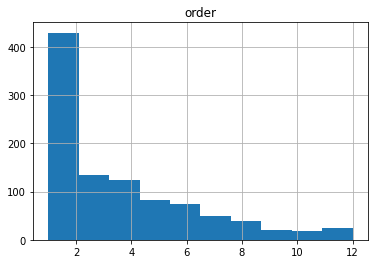

In [181]:
dm.decide()
dm.experiment_data.groupby("subject.id").agg({"order": "max"}).hist()

In [191]:
sum((dm.experiment_data.value - dm.experiment_data.value.mean())*dm.experiment_data.value - dm.experiment_data.value.mean())/len(dm.experiment_data.value)

87.82139300894835

<AxesSubplot:>

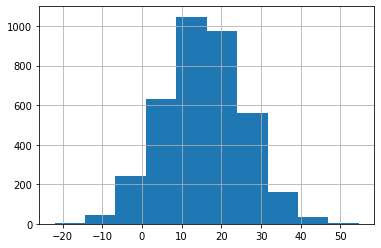

In [190]:
dm.experiment_data.value.hist()

array([[<AxesSubplot:title={'center':'rank'}>]], dtype=object)

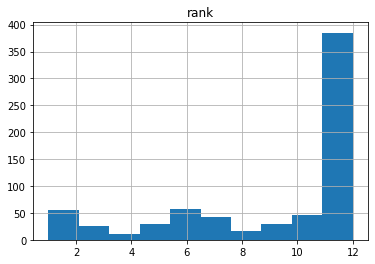

In [57]:
raw_df.groupby("subject").agg({"rank": "max"}).hist()

In [26]:
env.Vhat

,0,1,2,3,4,5,6,7,8,9,10,11
0,18.329185,16.671441,15.657170,15.450026,14.733767,14.706472,13.328853,13.009686,12.830641,12.538242,12.530925,10.019482
1,18.949280,16.957041,16.542437,14.656613,11.321479,10.890305,10.828006,10.179534,8.495272,8.287880,7.539532,7.533147
2,18.077032,16.042489,14.897663,14.775747,14.489457,13.125856,12.110772,11.311346,11.009882,10.924860,8.296500,8.013954
3,18.424268,18.416545,14.792301,13.799215,12.957025,12.833106,12.516398,11.901139,11.003435,10.972779,10.327521,9.483568
4,16.084609,14.172796,13.857251,13.823182,13.299089,12.853207,12.401292,11.951811,11.321370,10.836013,10.803401,9.856299
...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.711789,15.845767,15.617816,14.885631,14.387807,12.804029,12.059512,11.964870,11.469846,10.773286,10.241428,7.860915
96,19.502575,16.753145,16.587993,14.844583,14.769319,13.977048,13.746909,12.889400,12.842023,11.828972,10.949361,9.726086
97,15.428330,14.876885,14.325312,13.318201,13.254059,12.671253,12.558588,11.881652,11.800965,11.693420,8.093733,7.886840
98,18.752256,13.602249,13.097168,13.087974,12.710841,12.644623,12.151218,12.103033,11.435922,11.074207,10.881494,8.214076


<AxesSubplot:xlabel='options'>

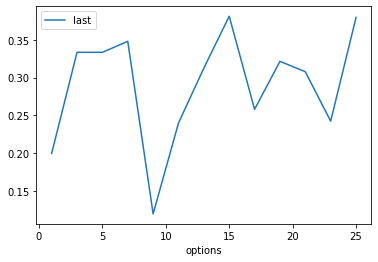

In [177]:
## Sanity check data

n = 100
filename = f"~/Desktop/thesis/data/generated_random_n={n}.csv"
df = pd.read_csv(filename)
df.groupby("options").agg({"last": "mean"}).plot()

<AxesSubplot:xlabel='value_bin'>

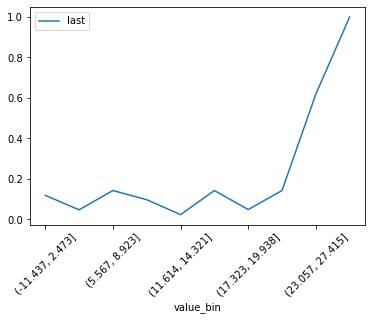

In [178]:
filename = f"~/Desktop/thesis/data/generated_gaussian_optimal_n={n}.csv"
df = pd.read_csv(filename)
df["value_bin"] = pd.qcut(df["value"], q=10)
df.groupby("value_bin").agg({"last": "mean"}).plot(rot=45)